<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-&amp;-label" data-toc-modified-id="Image-&amp;-label-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image &amp; label</a></span><ul class="toc-item"><li><span><a href="#word" data-toc-modified-id="word-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>word</a></span></li></ul></li><li><span><a href="#label-by-class" data-toc-modified-id="label-by-class-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>label by class</a></span></li><li><span><a href="#Shape-by-class" data-toc-modified-id="Shape-by-class-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Shape by class</a></span></li><li><span><a href="#Preprocessed-image" data-toc-modified-id="Preprocessed-image-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessed image</a></span><ul class="toc-item"><li><span><a href="#CT-image" data-toc-modified-id="CT-image-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>CT image</a></span></li><li><span><a href="#CT-label" data-toc-modified-id="CT-label-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CT label</a></span></li></ul></li></ul></div>

pip install **nibabel**

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

C:\Users\wogur\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Image & label

In [2]:
img = nib.load("../dataset/ct_train_test/ct_train/ct_train_1001_image.nii/20111228_115552XHCoronaryCTACardiacs502a005.nii")
label = nib.load("../dataset/ct_train_test/ct_train/ct_train_1001_label.nii/ct_train_1001_label.nii")

In [3]:
print('image shape: ',img.shape)
print('Label shape: ',label.shape)

image shape:  (512, 512, 363)
Label shape:  (512, 512, 363)


In [4]:
img_header = img.header
print('='*100)
print('image')
print('='*100)
print(img_header)

label_header = label.header
print('='*100)
print('label')
print('='*100)
print(label_header)

image
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:0.000 TE:0.00'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 363   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.0000000e+00  3.5546875e-01  3.5546875e-01  4.4999999e-01
  0.0000000e+00  1.0000000e+00  1.0000000e+00  4.3155000e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0

The last value of header.get_zooms() is **the time** between scans in milliseconds;  
this is the equivalent of voxel size on the time axis.

In [5]:
print('='*100)
print('image')
print('='*100)
print(img_header.get_data_shape())
print(img_header.get_data_dtype())
print(img_header.get_zooms())

print('='*100)
print('label')
print('='*100)
print(label_header.get_data_shape())
print(label_header.get_data_dtype())
print(label_header.get_zooms())

image
(512, 512, 363)
int16
(0.35546875, 0.35546875, 0.45)
label
(512, 512, 363)
uint16
(0.35546875, 0.35546875, 0.45)


In [6]:
img_arr = img.get_data()
label_arr = label.get_data()

![](../assets/Data information.PNG)

## word
- vivo: 생채공학  
- abdominal: 복부의  
- aortic: 대동맥의  
- inplane resolution: 평면해상도  
- ventricle: 심신의  
- artrium: 심방  
- myocardium: 심근의  
- aorta: 대동맥  
- arotic valve: 대동맥 판막  
- pulmonary: 폐의

주의해서 봐야할 점은 **(6) the ascending aorta와 (7) the pulmonary artery** 두 가지이다. 각각 관점에 따라서, 스캔에 따라서 다르기 때문에 여기서 제시한 vessel 길이를 참고한다.

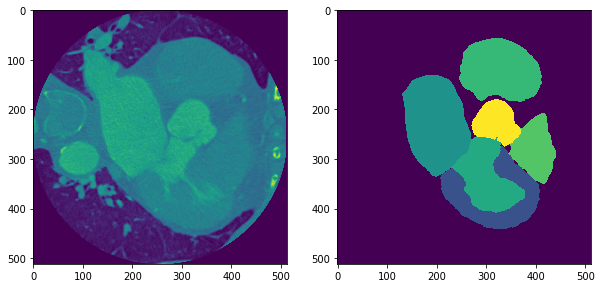

In [19]:
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img_arr[:,:,190])
ax[1].imshow(label_arr[:,:,190])

# label by class
총 7가지의 class가 있기 때문에 각각의 마스크를 분할해서 본다.

In [13]:
cls, cnt = np.unique(label_arr,return_counts=True)
print('Class values: ',cls)
print('Number of Classes: ',cnt)

Class values:  [  0 205 420 500 550 600 820 850]
Number of Classes:  [81219808  2147646  2291076  1089815  2335548  2190491  2077330  1806558]


In [14]:
c1_mask = label_arr == 500
c2_mask = label_arr == 600
c3_mask = label_arr == 420
c4_mask = label_arr == 550
c5_mask = label_arr == 205
c6_mask = label_arr == 820
c7_mask = label_arr == 850

c1_label = label_arr * c1_mask
c2_label = label_arr * c2_mask
c3_label = label_arr * c3_mask
c4_label = label_arr * c4_mask
c5_label = label_arr * c5_mask
c6_label = label_arr * c6_mask
c7_label = label_arr * c7_mask
c_labels = [c1_label, c2_label, c3_label, c4_label, c5_label, c6_label, c7_label]

# Shape by class

In [15]:
for i in range(len(c_labels)):
    print('class {} shape: {}'.format(i, c_labels[i].shape))

class 0 shape: (512, 512, 363)
class 1 shape: (512, 512, 363)
class 2 shape: (512, 512, 363)
class 3 shape: (512, 512, 363)
class 4 shape: (512, 512, 363)
class 5 shape: (512, 512, 363)
class 6 shape: (512, 512, 363)


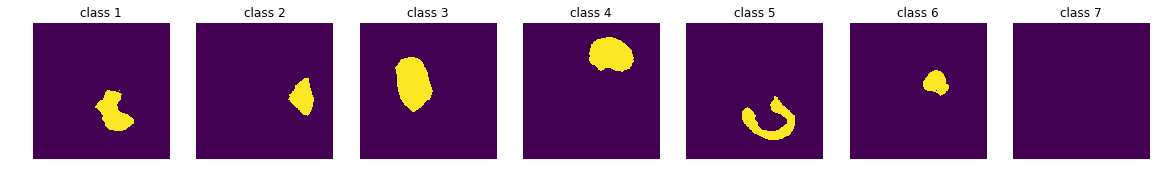

In [20]:
f, ax = plt.subplots(1,7,figsize=(20,5))

for i in range(len(c_labels)):
    ax[i].imshow(c_labels[i][:,:,190])
    ax[i].axis('off')
    ax[i].set_title('class '+str(i+1))

# Preprocessed image

In [3]:
ct_img = nib.load('../dataset/ct_imgs.nii').get_data()
ct_label = nib.load('../dataset/ct_labels.nii').get_data()
mr_img = nib.load('../dataset/mr_imgs.nii').get_data()
mr_label = nib.load('../dataset/mr_labels.nii').get_data()

In [4]:
print('ct_img shape: ',ct_img.shape)
print('ct_label.shape: ',ct_label.shape)
print('mr_img.shape: ',mr_img.shape)
print('mr_label.shape: ',mr_label.shape)

ct_img shape:  (256, 256, 256, 1)
ct_label.shape:  (256, 256, 256, 8)
mr_img.shape:  (256, 256, 256, 1)
mr_label.shape:  (256, 256, 256, 8)


## CT image

(-0.5, 255.5, 255.5, -0.5)

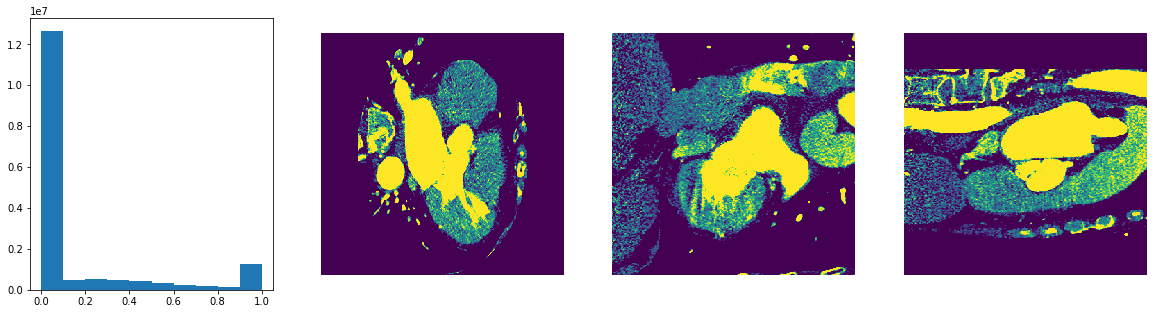

In [17]:
f, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].hist(ct_img.reshape(-1))
ax[1].imshow(ct_img[:,:,128].reshape(256,256))
ax[1].axis('off')
ax[2].imshow(ct_img[:,128,:].reshape(256,256))
ax[2].axis('off')
ax[3].imshow(ct_img[128,:,:].reshape(256,256))
ax[3].axis('off')

## CT label

In [19]:
labels, cnt = np.unique(ct_label, return_counts=True)
print('labels :',labels)
print('cnt: ',cnt)

labels : [0. 1.]
cnt:  [117440512  16777216]


In [23]:
ct_label_argmax = np.argmax(ct_label, axis=-1)
labels_argmax, cnt_argmax = np.unique(ct_label_argmax, return_counts=True)
print('labels :',labels_argmax)
print('cnt: ',cnt_argmax)

labels : [0 1 2]
cnt:  [15045729   266738  1464749]
